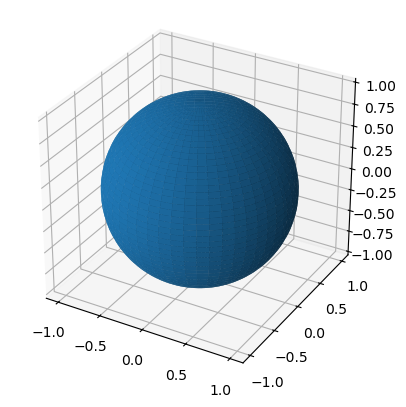

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x =  np.outer(np.cos(u), np.sin(v))
y =  np.outer(np.sin(u), np.sin(v))
z =  np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z)

# Set an equal aspect ratio
ax.set_aspect('equal')

plt.show()

In [63]:
#https://likegeeks.com/3d-sphere-python/
import numpy as np
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 50)
theta, phi = np.meshgrid(theta, phi)
r = 1
# Convert to Cartesian coordinates
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)
print(f"Shape of x, y, z: {x.shape}")
print(f"Min and max values - x: ({x.min():.2f}, {x.max():.2f}), y: ({y.min():.2f}, {y.max():.2f}), z: ({z.min():.2f}, {z.max():.2f})")


Shape of x, y, z: (50, 100)
Min and max values - x: (-1.00, 1.00), y: (-1.00, 1.00), z: (-1.00, 1.00)


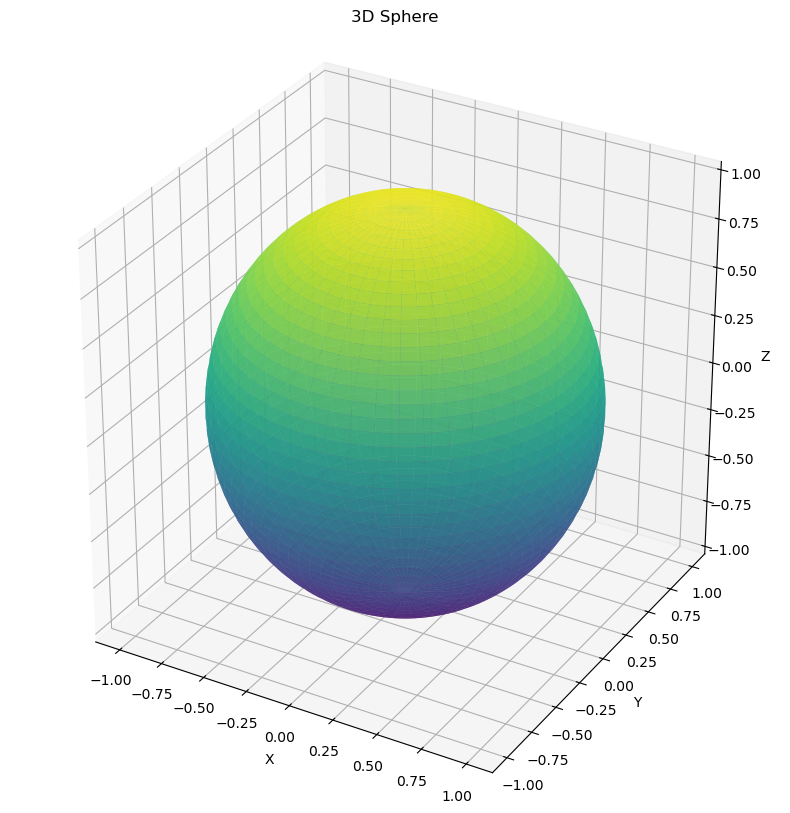

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Sphere')
ax.set_box_aspect((1, 1, 1))
plt.show()

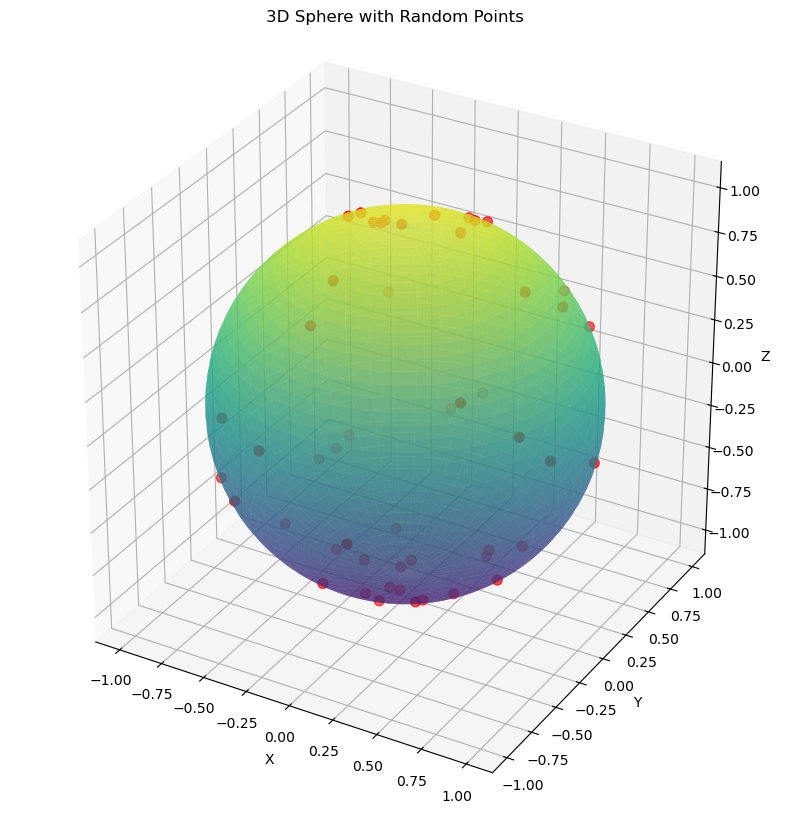

In [5]:
import numpy as np
import matplotlib.pyplot as plt
num_points = 50
theta_points = np.random.uniform(0, 2 * np.pi, num_points)
phi_points = np.random.uniform(0, np.pi, num_points)
x_points = r * np.sin(phi_points) * np.cos(theta_points)
y_points = r * np.sin(phi_points) * np.sin(theta_points)
z_points = r * np.cos(phi_points)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)
ax.scatter(x_points, y_points, z_points, c='red', s=50)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Sphere with Random Points')
ax.set_box_aspect((1, 1, 1))
plt.show()

In [2]:
import numpy as np
import healpy as hp
def pixel_corners(order):
    pix_num = hp.order2npix(order)
    pixel_corners = dict()
    for ind in range(pix_num):
        #Setting step to something greater than 1 would allow you to find more coordinates along the boundaries
         vertices = hp.boundaries(hp.order2nside(order), ind, step=1)
         theta, phi  = hp.vec2ang(vertices.T)
        #  theta = np.rad2deg(rad_theta)
        #  phi = 90 - np.rad2deg(rad_phi)
         toAdd = []
         for i in range(4):
             toAdd.append((theta[i], phi[i]))
         pixel_corners[ind] = toAdd
         
         
         
        
        
    
    return pixel_corners

In [7]:
g = pixel_corners(0)
g


{0: [(0.0, 0.0),
  (0.8410686705679303, 0.0),
  (1.5707963267948966, 0.7853981633974483),
  (0.8410686705679303, 1.5707963267948966)],
 1: [(0.0, 0.0),
  (0.8410686705679303, 1.5707963267948966),
  (1.5707963267948966, 2.356194490192345),
  (0.8410686705679303, 3.141592653589793)],
 2: [(0.0, 0.0),
  (0.8410686705679303, 3.141592653589793),
  (1.5707963267948966, 3.926990816987241),
  (0.8410686705679303, 4.71238898038469)],
 3: [(0.0, 0.0),
  (0.8410686705679303, 4.71238898038469),
  (1.5707963267948966, 5.497787143782138),
  (0.8410686705679303, 0.0)],
 4: [(0.8410686705679303, 0.0),
  (1.5707963267948966, 5.497787143782138),
  (2.300523983021863, 0.0),
  (1.5707963267948966, 0.7853981633974483)],
 5: [(0.8410686705679303, 1.5707963267948966),
  (1.5707963267948966, 0.7853981633974483),
  (2.300523983021863, 1.5707963267948966),
  (1.5707963267948966, 2.356194490192345)],
 6: [(0.8410686705679303, 3.141592653589793),
  (1.5707963267948966, 2.356194490192345),
  (2.300523983021863, 3.

In [8]:
x_coor = []
y_coor = []
z_coor = []
for key, val in g.items():
    for i in val:
        x_coor.append(r * np.sin(i[1]) * np.cos(i[0]))
        y_coor.append(r * np.sin(i[1]) * np.sin(i[0]))
        z_coor.append(r * np.cos(i[1]))


In [9]:
p = np.vstack((x_coor, y_coor, z_coor))
np.shape(p)


(3, 48)

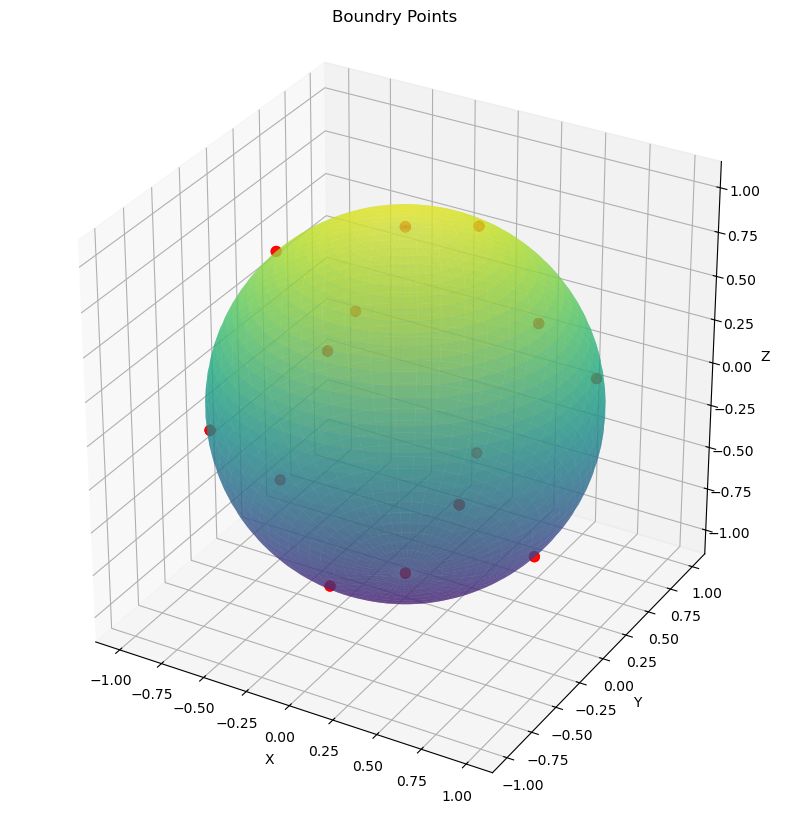

In [26]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6)
ax.scatter(x_coor, y_coor, z_coor, c='red', s=50)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Boundry Points')
ax.set_box_aspect((1, 1, 1))
plt.show()

In [27]:
test = hp.boundaries(hp.order2nside(0), 0, step=1)
test

array([[0.00000000e+00, 7.45355992e-01, 7.07106781e-01, 4.56398915e-17],
       [0.00000000e+00, 0.00000000e+00, 7.07106781e-01, 7.45355992e-01],
       [1.00000000e+00, 6.66666667e-01, 0.00000000e+00, 6.66666667e-01]])

In [6]:
x_coor = []
y_coor = []
z_coor = []
for i in range(12):
    test = hp.boundaries(hp.order2nside(0), i, step=1)
    x_coor.extend(test[0])
    y_coor.extend(test[1])
    z_coor.extend(test[2])
        
    

In [22]:
np.shape(y_coor)

(48,)

/tmp/ipykernel_1047576/968621756.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(new_x, new_y, new_z, c=np.random.rand(3,), s=1)


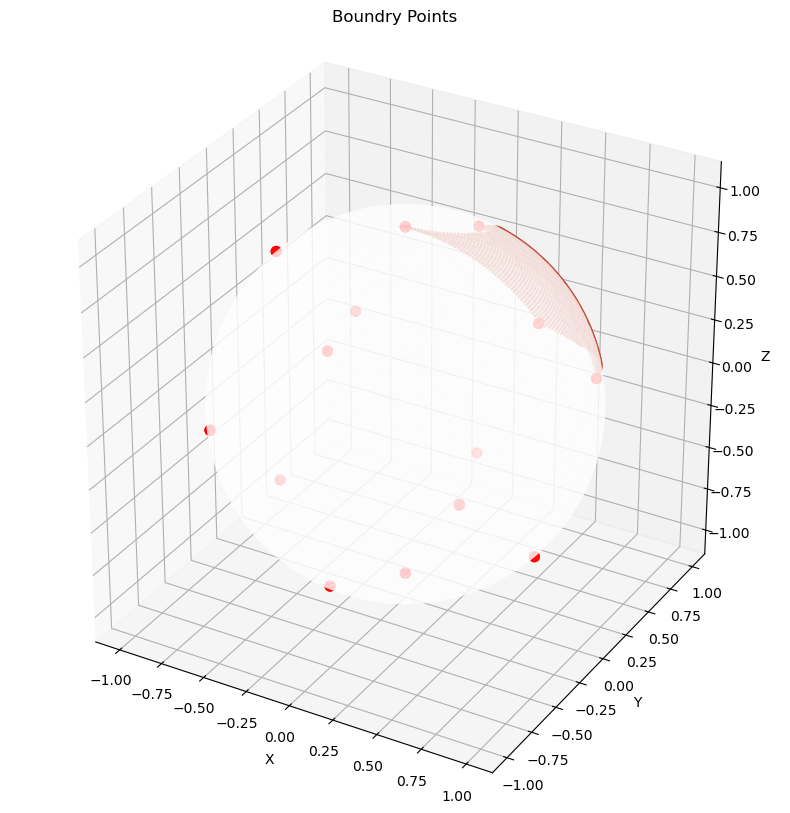

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap = mcolors.ListedColormap(['white']), alpha=0.6)
ax.scatter(x_coor, y_coor, z_coor, c='red', s=50)
ax.scatter(new_x, new_y, new_z, c=np.random.rand(3,), s=1)
# Create the polygon
#polygon = Poly3DCollection([test.T], alpha=0.5)
#ax.add_collection3d(polygon)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Boundry Points')
ax.set_box_aspect((1, 1, 1))
plt.show()


In [35]:
import math

def cartesian_to_spherical(x, y, z):
    """Converts Cartesian coordinates to spherical coordinates."""

    # Calculate radius (rho)
    rho = math.sqrt(x**2 + y**2 + z**2)

    # Calculate theta (azimuthal angle)
    theta = math.atan2(y, x)

    # Calculate phi (polar angle)
    phi = math.acos(z / rho)

    return theta, phi




t = []
p = []
for i in range(4):
    th, ph = cartesian_to_spherical(test[0][i], test[1][i], test[2][i])
    t.append(math.degrees(th))
    p.append(math.degrees(ph))
    

In [36]:
t

[0.0, 0.0, 45.0, 90.0]

In [42]:
both = np.vstack((t, p))

In [43]:
both

array([[ 0.       ,  0.       , 45.       , 90.       ],
       [ 0.       , 48.1896851, 90.       , 48.1896851]])

In [44]:
from shapely.geometry import Point, Polygon

# Create a polygon
polygon = Polygon(both.T)


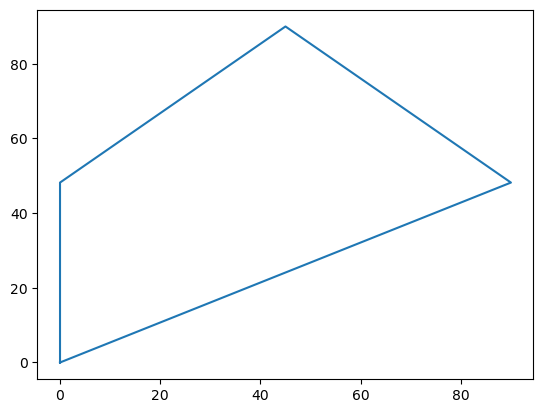

In [45]:
# Extract the coordinates of the polygon's exterior
x, y = polygon.exterior.xy

# Plot the polygon
plt.plot(x, y)
plt.show()

In [51]:
points = []
for i in range (int(np.min(x)),int(np.max(x)), 1 ):
    for j in range(int(np.min(y)), int(np.max(y)), 1):
        if(polygon.contains(Point(i, j))):
            points.append((i, j))

In [56]:
rad_points = []
for i in range(len(points)):
    rad_points.append((math.radians(points[i][0]), math.radians(points[i][1])))

In [57]:
rad_points

[(0.017453292519943295, 0.017453292519943295),
 (0.017453292519943295, 0.03490658503988659),
 (0.017453292519943295, 0.05235987755982989),
 (0.017453292519943295, 0.06981317007977318),
 (0.017453292519943295, 0.08726646259971647),
 (0.017453292519943295, 0.10471975511965978),
 (0.017453292519943295, 0.12217304763960307),
 (0.017453292519943295, 0.13962634015954636),
 (0.017453292519943295, 0.15707963267948966),
 (0.017453292519943295, 0.17453292519943295),
 (0.017453292519943295, 0.19198621771937624),
 (0.017453292519943295, 0.20943951023931956),
 (0.017453292519943295, 0.22689280275926285),
 (0.017453292519943295, 0.24434609527920614),
 (0.017453292519943295, 0.2617993877991494),
 (0.017453292519943295, 0.2792526803190927),
 (0.017453292519943295, 0.29670597283903605),
 (0.017453292519943295, 0.3141592653589793),
 (0.017453292519943295, 0.33161255787892263),
 (0.017453292519943295, 0.3490658503988659),
 (0.017453292519943295, 0.3665191429188092),
 (0.017453292519943295, 0.383972435438

In [60]:
new_x = []
new_y = []
new_z = []
for i in range(len(rad_points)):
    theta = rad_points[i][0]
    phi = rad_points[i][1]
    new_x.append(r * math.sin(phi) * math.cos(theta))
    new_y.append(r * math.sin(phi) * math.sin(theta))
    new_z.append( r * math.cos(phi))

In [8]:
hp.order2npix(0)

12